In [18]:
# Libraries
from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, roc_curve,
    mean_squared_error, mean_absolute_error, r2_score
)
import matplotlib.pyplot as plt
import numpy as np

# Part 1: Classification

In [19]:
# Generate synthetic classification data
X_clf, y_clf = make_classification(n_samples=1000, n_features=10, n_informative=7,
                                   n_redundant=2, random_state=42)
print(f'X_clf shape: {X_clf.shape}')
print(f'y_clf shape: {y_clf.shape}')

X_clf shape: (1000, 10)
y_clf shape: (1000,)


In [20]:
# Train-test split
Xtr_clf, Xte_clf, ytr_clf, yte_clf = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)

In [21]:
# Train Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(Xtr_clf, ytr_clf)

RandomForestClassifier(random_state=42)

In [22]:
# Predictions
y_pred_clf = clf.predict(Xte_clf)
y_prob_clf = clf.predict_proba(Xte_clf)[:, 1]

In [23]:
# Classification metrics
print('=== Classification Metrics ===')
print(f'Accuracy: {(accuracy_score(yte_clf, y_pred_clf)):.4f}')
print(f'Precision: {(precision_score(yte_clf, y_pred_clf)):.4f}')
print(f'Recall: {(recall_score(yte_clf, y_pred_clf)):.4f}')
print(f'F1 Score: {(f1_score(yte_clf, y_pred_clf)):.4f}')
print(f'ROC AUC Score: {(roc_auc_score(yte_clf, y_prob_clf)):.4f}')

=== Classification Metrics ===
Accuracy: 0.9300
Precision: 0.9615
Recall: 0.9091
F1 Score: 0.9346
ROC AUC Score: 0.9751


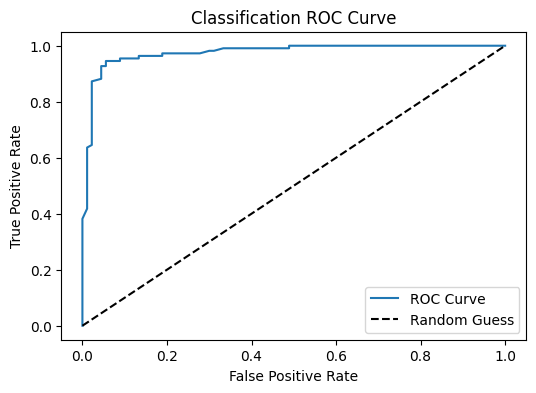

In [24]:
# ROC Curve
fpr, tpr, _ = roc_curve(yte_clf, y_prob_clf)
plt. figure(figsize=(6,4))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0,1], [0,1],'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Classification ROC Curve')
plt.legend()
plt.show()

# Part 2: Regression

In [25]:
# Generate synthetic regression data
X_reg, y_reg = make_regression(n_samples=100, n_features=10, noise=10.0,
                               random_state=42)
print(f'X_reg shape: {X_reg.shape}')
print(f'y_reg shape: {y_reg.shape}')

X_reg shape: (100, 10)
y_reg shape: (100,)


In [26]:
# Train-test split
Xtr_reg, Xte_reg, ytr_reg, yte_reg = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

In [27]:
# Train Random Forest Regressor
reg = RandomForestRegressor(n_estimators=100, random_state=42)
reg.fit(Xtr_reg, ytr_reg)

RandomForestRegressor(random_state=42)

In [28]:
# Predictions
y_pred_reg = reg.predict(Xte_reg)

In [30]:
# Regression metrics
mse = mean_squared_error(yte_reg, y_pred_reg)
rmse = np.sqrt(mse)

print('=== Regression Metrics ===')
print(f'MAE: {(mean_absolute_error(yte_reg, y_pred_reg)):.4f}')
print(f'MSE: {(mse):.4f}')
print(f'RMSE: {(rmse):.4f}')
print(f'R-squared: {(r2_score(yte_reg, y_pred_reg)):.4f}')

=== Regression Metrics ===
MAE: 120.1898
MSE: 21795.5448
RMSE: 147.6331
R-squared: 0.6374
